# **BUSINESS PROBLEM**

The financial industry faces the challenge of customer churn, where customers discontinue their relationship with the bank. This attrition can adversely affect the bank's financial performance and reputation. The primary goal of this project is to develop a predictive model that accurately identifies customers who are likely to churn. By anticipating potential churners, the bank can implement targeted strategies to prevent customer attrition, such as offering personalized incentives, improving customer service, and enhancing communication.

Customer churn refers to the phenomenon where customers or clients stop doing business with a company or cease using its services. It's a significant concern for businesses across various industries as it can lead to revenue loss, decreased market share, and increased customer acquisition costs. To address this challenge, businesses often turn to advanced analytical techniques like Artificial Neural Networks (ANNs) to predict and mitigate customer churn. ANNs are a subset of machine learning algorithms inspired by the human brain's structure and functioning.

The dataset contains information about the customers of a particular bank. The information includes:

* RowNumber: The number of the row in the dataset.
* CustomerId: The unique identifier for each customer.
* Surname: The customer's surname.
* CreditScore: The customer's credit score.
* Geography: The country in which the customer resides.
* Gender: The customer's gender.
* Age: The customer's age.
* Tenure: The length of time the customer has been a customer of the bank.
* Balance: The customer's account balance.
* NumOfProducts: The number of products the customer owns.
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no).
* IsActiveMember: How active the customer is as a member of the bank (1 = active, 0 = not active).
* EstimatedSalary: The customer's estimated salary.
* Exited: Whether the customer has left the bank (1 = yes, 0 = no).

In [1093]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import random
warnings.filterwarnings('ignore')


In [1094]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **DATA UNDERSTANDING**

In [1095]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1096]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [1097]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,RowNumber,int64,0,0.0,10000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,CustomerId,int64,0,0.0,10000,"[15634602, 15647311, 15619304, 15701354, 15737..."
2,Surname,object,0,0.0,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba..."
3,CreditScore,int64,0,0.0,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
4,Geography,object,0,0.0,3,"[France, Spain, Germany]"
5,Gender,object,0,0.0,2,"[Female, Male]"
6,Age,int64,0,0.0,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
7,Tenure,int64,0,0.0,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
8,Balance,float64,0,0.0,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
9,NumOfProducts,int64,0,0.0,4,"[1, 3, 2, 4]"


In [1098]:
df.shape

(10000, 14)

In [1099]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [1100]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1101]:
df.duplicated().sum()

0

In [1102]:
df.loc[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [1103]:
df.drop("RowNumber",axis=1, inplace=True)
df.drop("CustomerId",axis=1, inplace=True)
df.drop("Surname",axis=1, inplace=True)

From the analysis results above, the domain knowledge that can be obtained is: 

* Raw data set has 10000 rows and 14 columns
* We have 9 numerical columns and 4 categorical/non numerical columns
* The average credit score is 650 with a standard deviation of 96. 75% of the population has a credit score of 718
* We have 3 geographical locations, Majority of the customers are located in France constituting 5014 of the population
* Male gender constitutes more than 50% of the population
* The average age of the population is 38 with 50%+ of the population aged above 37
* The average tenure is 5 years.
* The mean account balance is 76485. We observe a high std of 62397
* 50% of the customers have account balances of 97,000 with a max observed of 250898
* On average a customer has 1 -2 products held with the bank.
* The average estimated salary is 100,000 which constitutes more than 50% of the population as observed
* There is no missing value and duplicated data in these dataset
* We drop irrelevant feature such as RowNumber, CustomerId, and Surname

# **DATA ANALYSIS**

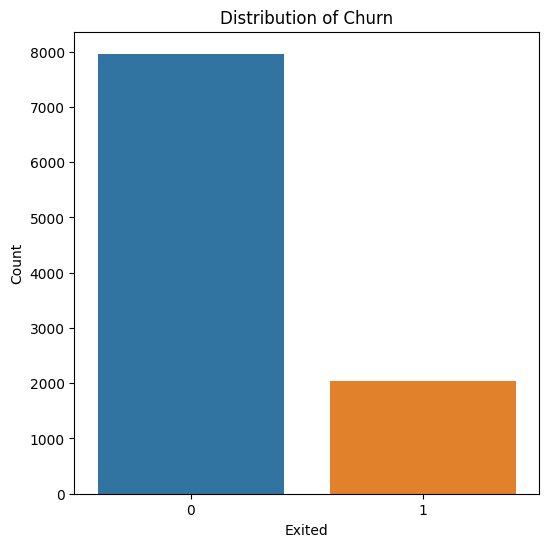

In [1104]:
diagnosis_counts = df['Exited'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()

By observing this visualization, we can gather the following insights:

* The majority of customers fall under the category of "Not Exited" (0), indicating that they are still active and haven't churned.
* The count of customers who have exited (1) is relatively smaller in comparison to those who have not exited.

In [1105]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Menampilkan data fitur kategorikal dan target
data_subset = df[categorical_columns + ['Exited']]
print(data_subset.head())

  Geography  Gender  HasCrCard  IsActiveMember  Exited
0    France  Female          1               1       1
1     Spain  Female          0               1       0
2    France  Female          1               0       1
3    France  Female          0               0       0
4     Spain  Female          1               1       0


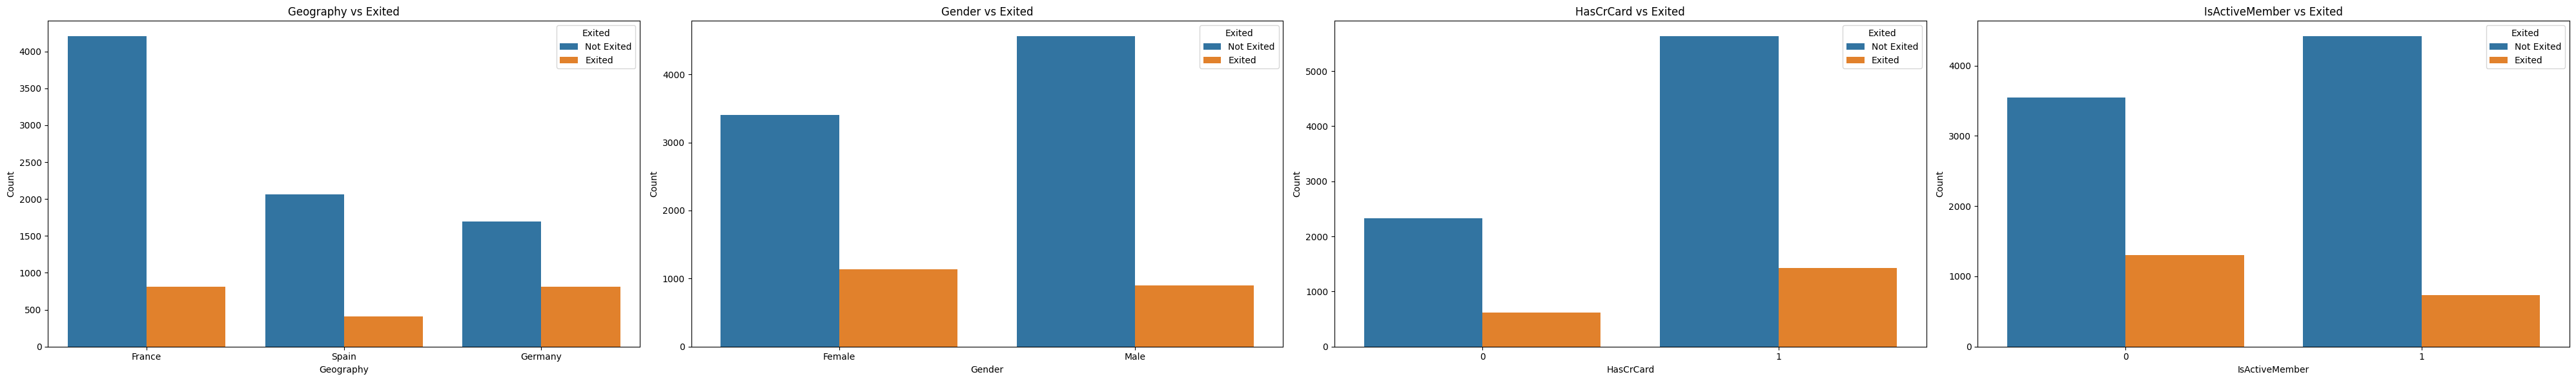

In [1106]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

num_columns = len(categorical_columns)
num_rows = 1
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10*num_columns, 6*num_rows))

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=column, hue='Exited', data=df, ax=ax)
    ax.set_title(f'{column} vs Exited')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Exited', labels=['Not Exited', 'Exited'])

plt.tight_layout()
plt.show()

We observed that across all the analyzed categorical features, customers who did not exit (0) dominate in terms of quantity. This suggests that in each category of these features, the number of customers choosing to remain active is higher compared to the number of customers who exited.

This indicates that within the context of these categorical features, the general tendency is for customers to be more inclined to stay within the service rather than exit.

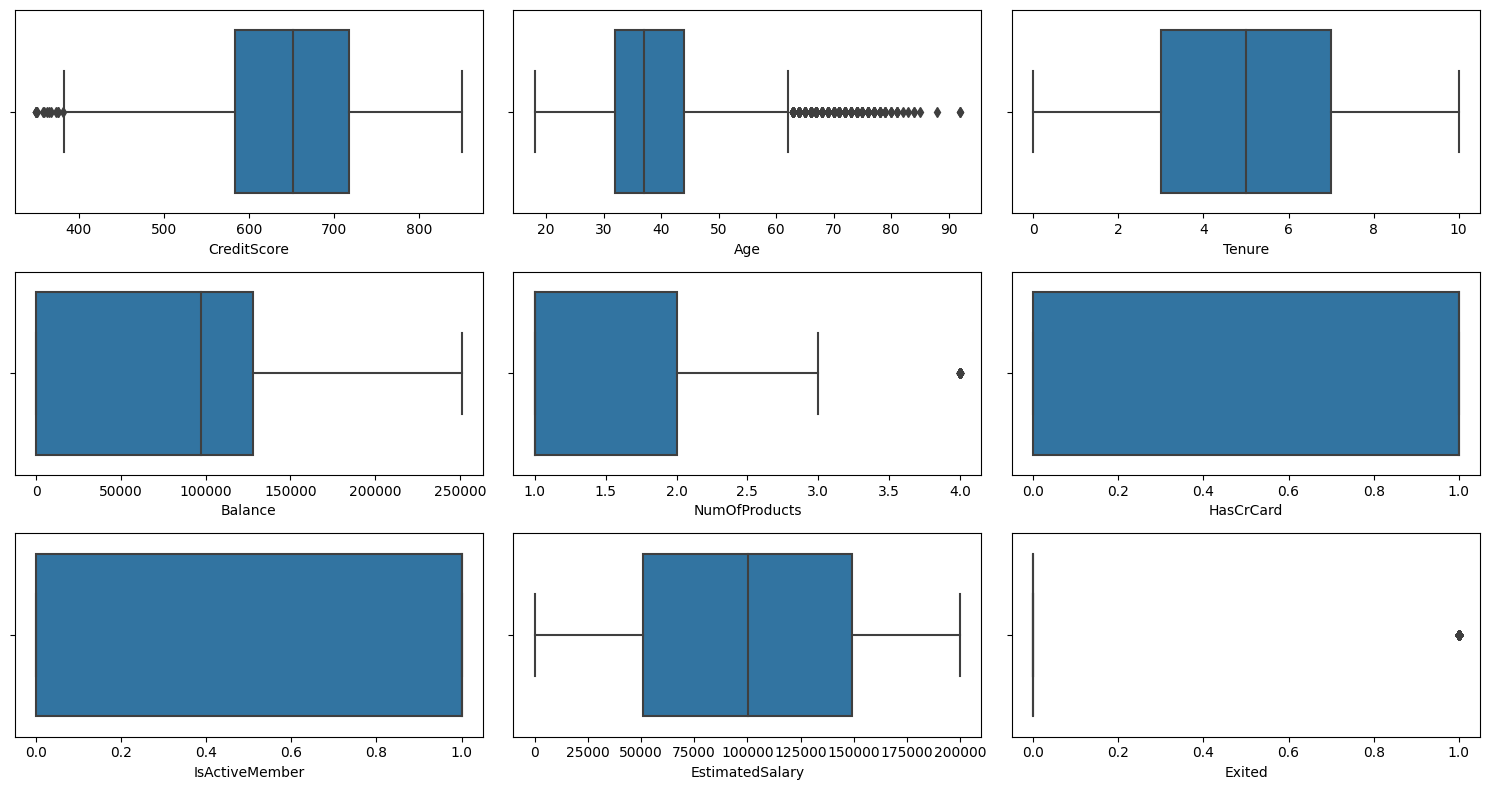

In [1107]:
plt.figure(figsize=(15,8))

plotnumber = 1
for kolom in df.describe().columns:

    plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, x=kolom)

    plotnumber += 1
    
plt.tight_layout()

From the graph above we can see slightly outliers from feature and fine amount of other feature

<AxesSubplot: >

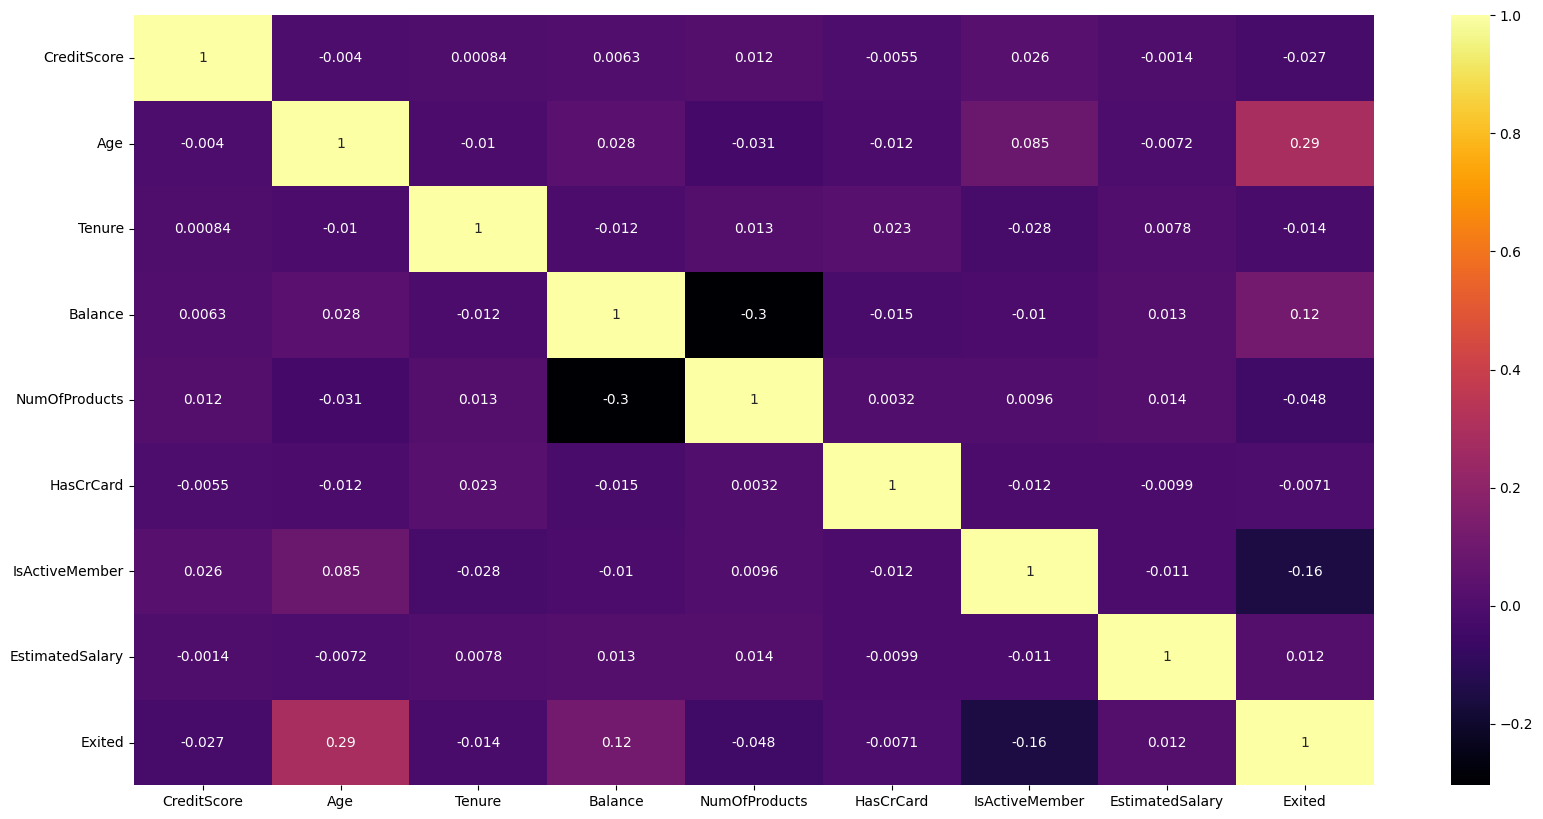

In [1108]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor, annot=True, ax=ax, cmap='inferno')

From the graph above we can see correlation matrix of our dataset

# **DATA PREPROCESSING**

Making copy of the data

In [1109]:
df_copy = df.copy()

Separate data from features and targets

In [1110]:
X=df_copy.drop("Exited",axis=1)
y=df_copy["Exited"]

In [1111]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Feature Scaling

In [1112]:
OneHotEnc = ['Geography','Gender']
NumericCols = X.select_dtypes(include=['float64', 'int64']).columns

In [1113]:
# Create a ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), OneHotEnc),
        ('scaler', StandardScaler(), NumericCols)
    ],
    remainder='passthrough'
)


In [1114]:
X_transformed = ct.fit_transform(X)

In [1115]:
X_transformed_df = pd.DataFrame(X_transformed, columns=ct.get_feature_names_out(input_features=X.columns))
X_transformed_df

,encoder__Geography_Germany,encoder__Geography_Spain,encoder__Gender_Male,scaler__CreditScore,scaler__Age,scaler__Tenure,scaler__Balance,scaler__NumOfProducts,scaler__HasCrCard,scaler__IsActiveMember,scaler__EstimatedSalary
0,0.0,0.0,0.0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,0.0,1.0,0.0,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,0.0,0.0,0.0,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.0,0.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,0.0,1.0,0.0,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,0.0,0.0,1.0,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.0,0.0,0.0,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.0,0.0,1.0,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


Splitting Data

In [1116]:
X_train, X_test, y_train, y_test =train_test_split(
    X_transformed_df,
    y,
    test_size=0.2,
    random_state=1,
)

In [1117]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)


Creating ANN Models

In [1118]:
model = keras.Sequential([
    layers.Dense(units=11, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(units=7, activation='relu'),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 11)                132       
                                                                 
 dense_127 (Dense)           (None, 7)                 84        
                                                                 
 dense_128 (Dense)           (None, 6)                 48        
                                                                 
 dense_129 (Dense)           (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1119]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [1120]:
#Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [1121]:
EarlyStopping= tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode='auto',
                baseline=None,
                restore_best_weights=False
)

In [1122]:
#Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.33, callbacks=[EarlyStopping])

Epoch 1/1000


536/536 [==============================] - 4s 5ms/step - loss: 0.4583 - accuracy: 0.7884 - val_loss: 0.3916 - val_accuracy: 0.8137
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3786 - accuracy: 0.8406 - val_loss: 0.3649 - val_accuracy: 0.8542
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3624 - accuracy: 0.8513 - val_loss: 0.3557 - val_accuracy: 0.8519
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8543 - val_loss: 0.3523 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8563 - val_loss: 0.3457 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8600 - val_loss: 0.3465 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8586 - val_loss: 0.3516 - val_accuracy: 0.8584
Epoch

In [1123]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [1124]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8610

Test accuracy: 0.8610000014305115


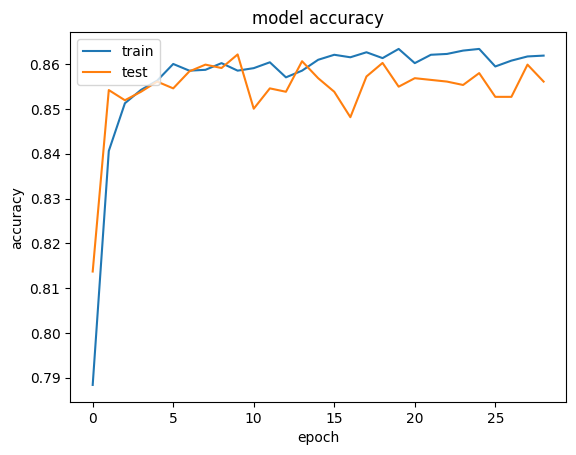

In [1125]:
#Plot history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

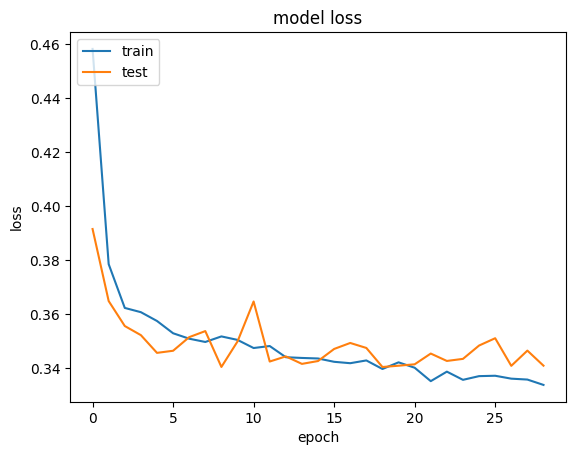

In [1126]:
#Plot history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1127]:
#Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [1128]:
confusion_mtx = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[1555   30]
 [ 248  167]]


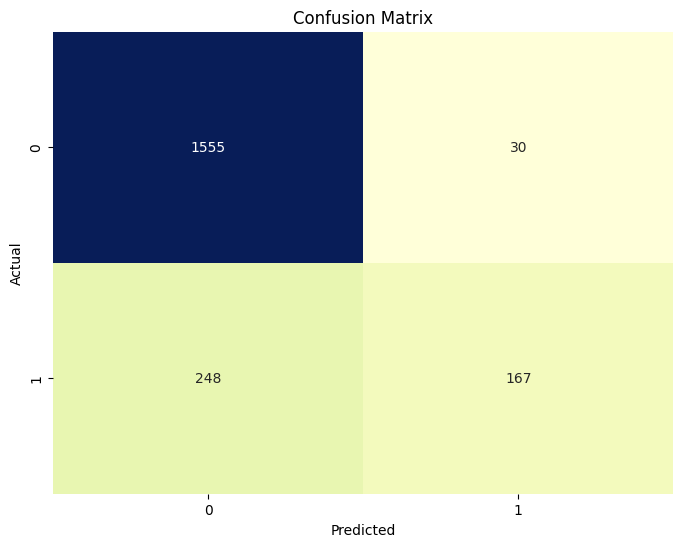

In [1129]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1130]:
model.get_weights

<bound method Model.get_weights of <keras.src.engine.sequential.Sequential object at 0x000001A607BA19D0>>

Classification Report

In [1131]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.85      0.40      0.55       415

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



# **CONCLUSION**

The developed Artificial Neural Network (ANN) model was designed to identify potential churners and mitigate the negative impact on customer retention and business revenue.

The more complex ANN architecture, consisting of multiple hidden layers with dropout regularization, was constructed to extract intricate patterns from the data. The goal was to create a model that accurately predicts whether a customer is likely to churn or not. After training and evaluating the model, it achieved a test accuracy of approximately 86%.

This accuracy suggests that the model is effective in distinguishing between customers who are likely to churn and those who are not, based on the provided features. It implies that the model's predictions could be utilized to identify high-risk customers and guide targeted retention efforts. This could involve personalized interventions, incentives, or communication strategies aimed at retaining those customers.